## Notes

In [1]:
###### UNIVARIATE LINEAR REGRESSION
# 1) test data variance: based on y_raw_test ????

###### ACCURACY
# 1) use training model (final m & b) to find testing model MSE
    
###### MAE
# 1) same update procedure w/ different formula?
    # y_star, m update, error, MAE
    # repeate univariate & multivariate models
    
###### RIDGE REGRESSION
# 1) initial values for lambda
    # derive new loss function derivative w/ penalty term
    # repeat univariate & multivariate models 


In [2]:
# MSE as stopping criteria - not needed in gradient descent
# use m and b from training data
# stopping criteria: MSE small, gradient small!!
# update m multiple times until stopping criteria is reached (while loop)
# define dL/dmi for each feature
# only keep final m and b values for testing data

# 1. PACKAGE IMPORTS

In [3]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Import Data

In [4]:
data = pd.read_excel('Concrete_Data.xls')
features = data.columns[0:8]
label = data.columns[8]
rows = data.shape[0]
cols = data.shape[1]
num_fts = cols - 1
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Visualize Data

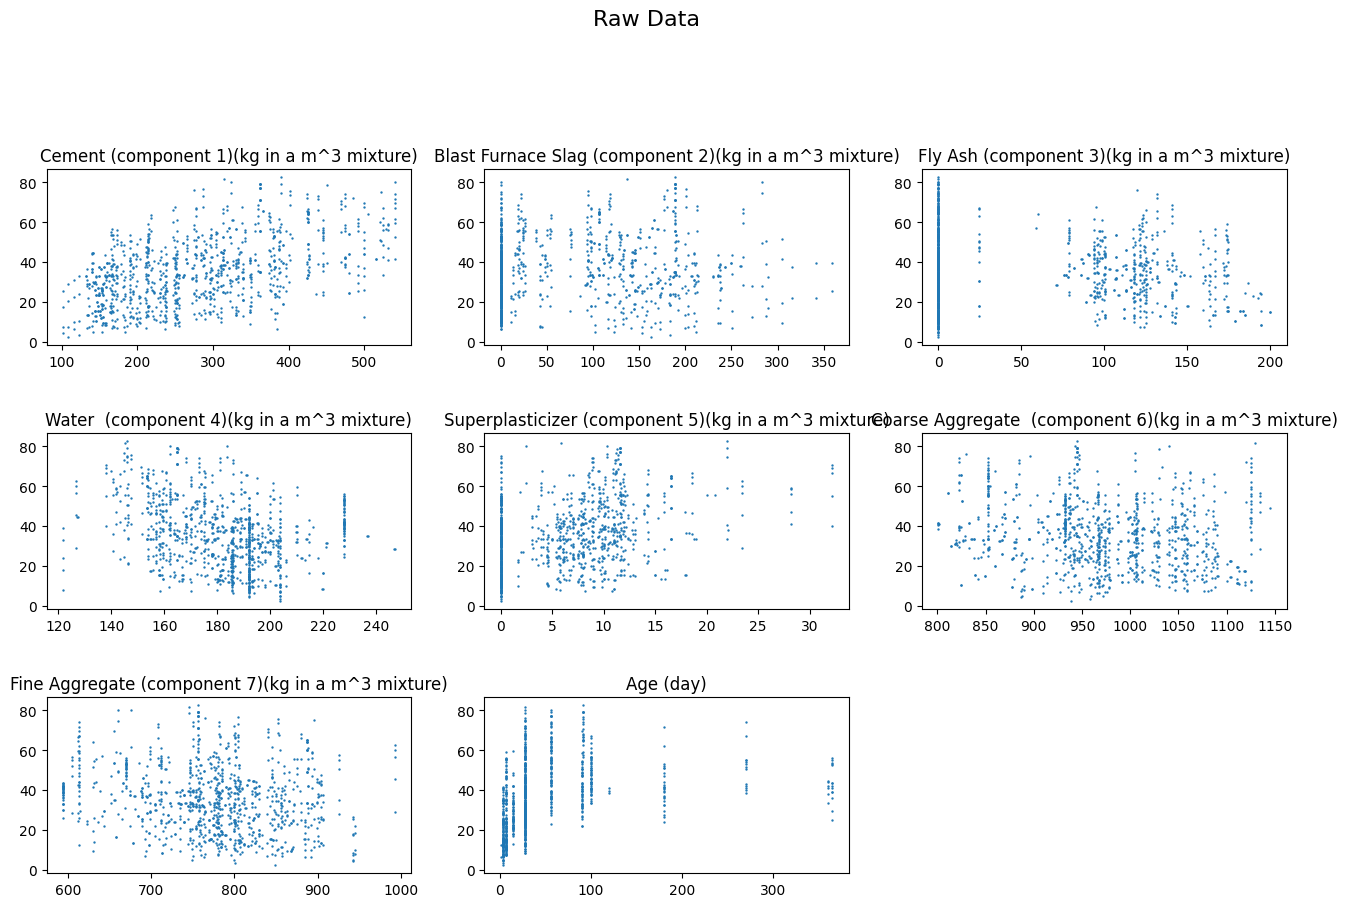

In [5]:

f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('Raw Data', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(data.values[:, index], data.values[:,8], s=0.5)
    ax.set_title(feature_name)
    
plt.show()

## 2. DATA PRE-PROESSING

In [6]:
# check for null values
for feature in features:
    data[feature].isnull().sum()
    # no null values!
    
# create x and y variables for raw data
x_raw = data.values[:,:8]
y_raw = data.values[:,8]
#print(x_raw)
#print(y_raw)

# normalize features
new = np.zeros((rows,cols))
for index,f in enumerate(features):
    new[:,index] = (data[f] - data[f].mean()) / data[f].std()

# standaradize target
new[:,8] = (data[label] - data[label].mean()) / data[label].std()

# create x and y varaiables for new data
x_new = new[:,:8]
y_new = new[:,8]

# 3. SPLIT TRAINING & TESTING DATA

In [7]:
# split into training & testing sets
N_raw = len(y_raw)
N_new = len(y_new)
### should have 900 training samples
x_raw_train, x_raw_test, y_raw_train, y_raw_test = train_test_split(x_raw, y_raw, test_size=0.1255, random_state=10)
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.1255, random_state=10)
print(len(x_raw_train))
print(len(x_raw_test))

900
130


# 4. FUNCTIONS

In [8]:
def MSEUni(x, ft, m, b, y):
    err = 0
    n = len(x)
    for i in range(n):
        y_hat = m*x[i,ft] + b
        err += (y[i] - y_hat)**2
    MSE = 1/n * err
    return MSE

In [9]:
def MSEMulti(x, m, b, y):
    err = 0
    n = len(x)
    for i in range(n):
        y_hat = np.dot(m,x[i]) + b
        err += (y[i] - y_hat)**2
    MSE = 1/n * err
    return MSE

In [10]:
def R2(Var, MSE):
    r2 = 1- (MSE/Var)
    return r2

In [94]:
def UnivariateModel(x, y, ft, alpha):
    m = 0
    b = np.mean(y)
    sum_m = 0
    sum_b = 0
    n = len(x)
    dLdb = 1000
    dLdm = 1000
    cnt = 0
    while abs(dLdm) > 10e-6 and cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = m*x[i,ft]+b
            sum_m += (y[i] - y_star) * (-2 * x[i,ft])
            sum_b += (y[i] - y_star) * (-2)
        dLdm = 1/n * sum_m
        #print(dLdm)
        dLdb = 1/n * sum_b
        m_new = m - alpha * dLdm
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        var = np.var(y)
        mse = MSEUni(x, ft, m, b, y)
        r2 = R2(var, mse)
    #print('Variance: ', var)
    #print('MSE: ', mse)
    #print('R-squared: ', r2)
    return m, b, mse, r2

In [95]:
# best alpha: model with lowest MSE
def best_alphaUni(x, y, ft):
    alpha = np.linspace(0.000001,0.00001,10)
    best = 10000000
    best_alpha = 1000000
    for a in range(len(alpha)):
        [m, b, mse, r2] = UnivariateModel(x, y, ft, alpha[a])
        if mse < best:
            best = mse
            best_alpha = alpha[a]
    return best_alpha

In [96]:
def MultivariateModel(x, y, alpha):
    m = [0, 0, 0, 0, 0, 0, 0, 0]
    b = np.mean(y)
    sum_m = [0, 0, 0, 0, 0, 0, 0, 0]
    sum_b = 0
    n = len(x)
    dLdm = dLdb = 1000
    cnt = 0
    while cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = np.dot(m,x[i])+b
            sum_b += (y[i] - y_star) * (-2)
            sum_m += (y[i] - y_star) * (-2 * x[i])
        dLdm = 1/n * sum_m
        #print(dLdm)
        dLdb = 1/n * sum_b
        #print('m: ', m)
        m_new = m - alpha * dLdm
        #print('m_new: ',m_new)
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        var = np.var(y)
        mse = MSEMulti(x, m, b, y)
        r2 = R2(var, mse)
    #print('Variance: ', var)
    #print('MSE: ', mse)
    #print('R-squared: ', r2)
    return m, b, mse, r2

In [97]:
# find optimal value of alpha for feature 0
# best alpha: model with lowest MSE
def best_alphaMulti(x, y):
    alpha = np.linspace(0.0000001,0.000001,10)
    best = 10000000
    best_alpha = 1000000
    for a in range(len(alpha)):
        [m, b, mse, r2] = MultivariateModel(x, y, alpha[a])
        if mse < best:
            best = mse
            best_alpha = alpha[a]
    return best_alpha

# 5. UNIVARIATE LINEAR REGRESSION

### a) Raw Data

   ### i) Find best alpha values for each feature

In [15]:
best_a_Uni_raw = []
for f in range(cols-1):
    best_a_Uni_raw.append(best_alphaUni(x_raw_train, y_raw_train, f))
print("Best alpha values for each feature:")
for i in range(len(best_a_Uni_raw)):
    print('Feature ',i+1,': ',best_a_Uni_raw[i])

/var/folders/3k/0s83074d3_93z_bq3nvj2n0r0000gn/T/ipykernel_5399/3839313694.py:6: RuntimeWarning: overflow encountered in double_scalars
  err += (y[i] - y_hat)**2
/var/folders/3k/0s83074d3_93z_bq3nvj2n0r0000gn/T/ipykernel_5399/729774796.py:14: RuntimeWarning: overflow encountered in double_scalars
  sum_m += (y[i] - y_star) * (-2 * x[i,ft])
/var/folders/3k/0s83074d3_93z_bq3nvj2n0r0000gn/T/ipykernel_5399/729774796.py:14: RuntimeWarning: invalid value encountered in double_scalars
  sum_m += (y[i] - y_star) * (-2 * x[i,ft])


Best alpha values for each feature:
Feature  1 :  2e-06
Feature  2 :  4.9999999999999996e-06
Feature  3 :  4e-06
Feature  4 :  1e-05
Feature  5 :  4.9999999999999996e-06
Feature  6 :  1e-06
Feature  7 :  3e-06
Feature  8 :  4e-06


### ii) Find paramaters of univariate models

In [98]:
m_list_Uni_raw = []
b_list_Uni_raw = []
mse_list_Uni_raw = []
r2_list_Uni_raw = []
for f in range(cols-1):
    [m, b, mse, r2] = UnivariateModel(x_raw_train, y_raw_train, f, best_a_Uni_raw[f])
    m_list_Uni_raw.append(m)
    b_list_Uni_raw.append(b)
    mse_list_Uni_raw.append(mse)
    r2_list_Uni_raw.append(r2)
print('m parameter list: ', m_list_Uni_raw)
print('b parameter list: ', b_list_Uni_raw)
print('mse raw training data: ', mse_list_Uni_raw)
print('r2 raw training data: ', r2_list_Uni_raw)

m parameter list:  [0.062098347827096806, 0.03047265452693728, -0.030247449956495656, -0.11578502610406428, 1.2097920153561597, -0.0010924775292826085, -0.005026838777527598, 0.08266807950362107]
b parameter list:  [17.656943327097892, 33.96291705162049, 37.447293805537804, 56.39791349768973, 27.16755336614786, 36.49720113728066, 39.16666683233429, 31.33251838363886]
mse raw training data:  [212.6882415801493, 271.4085892475648, 273.5553600563911, 257.5544542724419, 240.4434070076813, 275.1522194461034, 273.5216357123352, 246.48693556564007]
r2 raw training data:  [0.2280159891932434, 0.014881642078073853, 0.0070896140516627515, 0.06516731186825453, 0.12727443541403838, 0.0012935723560528745, 0.0072120216384325975, 0.1053385381545745]


### iii) Run model on test data

In [99]:
mse_list_Uni_raw = []
var_list_Uni_raw = []
r2_list_Uni_raw = []
print("Univariate Raw Testing Data Performance")
for f in range(cols-1):
    print('Feature: ', f+1)
    var = np.var(y_raw_test)
    mse = MSEUni(x_raw_test, f, m_list_Uni_raw[f], b_list_Uni_raw[f], y_raw_test)
    r2 = R2(var, mse)
    mse_list_Uni_raw.append(mse)
    var_list_Uni_raw.append(var)
    r2_list_Uni_raw.append(r2)
    print('MSE: ', mse)
    print('Var: ', var)
    print('R-squared: ', r2)

Univariate Raw Testing Data Performance
Feature:  1
MSE:  219.39916849825258
Var:  300.81786226871424
R-squared:  0.2706577766240891
Feature:  2
MSE:  292.2578210392997
Var:  300.81786226871424
R-squared:  0.02845589409104976
Feature:  3
MSE:  290.70021186802074
Var:  300.81786226871424
R-squared:  0.03363380859230891
Feature:  4
MSE:  286.5145973704701
Var:  300.81786226871424
R-squared:  0.04754792415041942
Feature:  5
MSE:  268.50449988167304
Var:  300.81786226871424
R-squared:  0.10741836320270226
Feature:  6
MSE:  301.64080199947256
Var:  300.81786226871424
R-squared:  -0.002735674419570122
Feature:  7
MSE:  301.18007153975213
Var:  300.81786226871424
R-squared:  -0.0012040816602649773
Feature:  8
MSE:  268.23252878629825
Var:  300.81786226871424
R-squared:  0.10832246874126183


### b) New Data

#### i) Find best alpha values for each feature

In [104]:
best_a_Uni_new = []
for f in range(cols-1):
    best_a_Uni_new.append(best_alphaUni(x_new_train, y_new_train, f))
print("Best alpha values for each feature:")
for i in range(len(best_a_Uni_new)):
    print('Feature ',i+1,': ',best_a_Uni_new[i])

Best alpha values for each feature:
Feature  1 :  8e-06
Feature  2 :  8e-06
Feature  3 :  8e-06
Feature  4 :  8e-06
Feature  5 :  8e-06
Feature  6 :  8e-06
Feature  7 :  8e-06
Feature  8 :  3e-06


#### ii) Find paramaters of univariate models

In [100]:
m_list_Uni_new = []
b_list_Uni_new = []
mse_list_Uni_new = []
r2_list_Uni_new = []
for f in range(cols-1):
    [m, b, mse, r2] = UnivariateModel(x_new_train, y_new_train, f, best_a_Uni_new[f])
    m_list_Uni_new.append(m)
    b_list_Uni_new.append(b)
    mse_list_Uni_new.append(mse)
    r2_list_Uni_new.append(r2)
print('m parameter list: ', m_list_Uni_new)
print('b parameter list: ', b_list_Uni_new)
print('MSE new training data: ', mse_list_Uni_new)
print('R-squared new trainig data: ', r2_list_Uni_new)

m parameter list:  [0.5574481837765074, 0.1458903595478952, -0.10468058057584431, -0.3373865449526866, 0.42926409673565713, -0.1702396782286784, -0.20018397218931697, 0.23811633506768395]
b parameter list:  [-0.024336129657399858, -0.004558882100573934, -0.009713129248862229, -0.009508749387257683, -0.0005239147305621774, -0.004685604387067688, -0.005047284870558692, -0.014456901789947029]
MSE new training data:  [0.7567319063681033, 0.9709590948810626, 0.9796779577541391, 0.9037108847272912, 0.8578124891035888, 0.9642524715395518, 0.9584518086410658, 0.8889453032547342]
R-squared new trainig data:  [0.23345943264564284, 0.01645545905400636, 0.00762358340931546, 0.08457533180027565, 0.13106865648498012, 0.023249012778874478, 0.029124863118762168, 0.09953230282798475]


#### iii) Run model on test data

In [101]:
mse_list_Uni_new = []
var_list_Uni_new = []
r2_list_Uni_new = []
print("Univariate Normalized Testing Data Performance")
for f in range(cols-1):
    print('Feature: ', f+1)
    var = np.var(y_new_test)
    mse = MSEUni(x_new_test, f, m_list_Uni_new[f], b_list_Uni_new[f], y_new_test)
    r2 = R2(var, mse)
    mse_list_Uni_new.append(mse)
    var_list_Uni_new.append(var)
    r2_list_Uni_new.append(r2)
    print('MSE: ', mse)
    print('Var: ', var)
    print('R-squared: ', r2)

Univariate Normalized Testing Data Performance
Feature:  1
MSE:  0.74756664389752
Var:  1.0778922446698727
R-squared:  0.3064551233259145
Feature:  2
MSE:  1.0506111142213774
Var:  1.0778922446698727
R-squared:  0.025309701023826014
Feature:  3
MSE:  1.0452315197607487
Var:  1.0778922446698727
R-squared:  0.030300547267716027
Feature:  4
MSE:  1.0137955086120238
Var:  1.0778922446698727
R-squared:  0.05946488285336893
Feature:  5
MSE:  0.9473566162526601
Var:  1.0778922446698727
R-squared:  0.12110266964319039
Feature:  6
MSE:  1.0248800205983706
Var:  1.0778922446698727
R-squared:  0.0491813762773089
Feature:  7
MSE:  1.0673259512488977
Var:  1.0778922446698727
R-squared:  0.009802736287624958
Feature:  8
MSE:  0.9718782569945724
Var:  1.0778922446698727
R-squared:  0.09835304799671252


## 6. MULTIVARIATE LINEAR REGRESSION

### a) Raw Data

#### i) Find best alpha value for the model

In [24]:
best_a_Multi_raw = best_alphaMulti(x_raw_train, y_raw_train)
print('Best alpha value: ', best_a_Multi_raw)

Best alpha value:  5e-07


#### ii) Find parameters of Multivariate Model

In [102]:
[m_Multi_raw, b_Multi_raw, mse_Multi_raw, r2_Multi_raw] = MultivariateModel(x_raw_train, y_raw_train, best_a_Multi_raw)
print('m: ',m_Multi_raw)
print('b: ',b_Multi_raw)
print('MSE raw training data Multivariate: ', mse_Multi_raw)
print('R-squared raw trainig data Multivariate: ', r2_Multi_raw)

m:  [ 0.0697919   0.1322987   0.10815676 -0.19663906  0.10416468 -0.00487763
 -0.00062988  0.11156247]
b:  35.6813107250062
MSE raw training data Multivariate:  152.51842498450927
R-squared raw trainid data Multivariate:  0.4464114021221002


#### iii) Run model on raw testing data

In [103]:
var = np.var(y_raw_test)
mse = MSEMulti(x_raw_test, m_Multi_raw, b_Multi_raw, y_raw_test)
r2 = R2(var, mse)
print("Multivariate Raw Testing Data Performance")
print('MSE: ', mse)
print('Var: ', var)
print('R-squared: ', r2)

Multivariate Raw Testing Data Performance
MSE:  161.72375100675447
Var:  300.81786226871424
R-squared:  0.46238647603216443


### b) New Data

#### i) Find best alpha value for the model

In [27]:
best_a_Multi_new = best_alphaMulti(x_new_train, y_new_train)
print('Best alpha value: ', best_a_Multi_new)

Best alpha value:  3e-07


#### ii) Find parameters of Multivariate Model

In [28]:
[m_Multi_new, b_Multi_new, mse_Multi_raw, r2_Multi_raw] = MultivariateModel(x_new_train, y_new_train, best_a_Multi_new)
print('m: ',m_Multi_new)
print('b: ',b_Multi_new)
print('MSE new training data Multivariate: ', mse_Multi_raw)
print('R-squared new training data Multivariate: ', r2_Multi_raw)

m:  [ 0.44843105  0.13436287 -0.07005472 -0.27989453  0.3288249  -0.12903956
 -0.17354736  0.33694554]
b:  -0.007418442516934417
MSE raw training data Multivariate:  0.44122509838725643


#### iii) Run model on new testing data

In [29]:
var = np.var(y_new_test)
mse = MSEMulti(x_new_test, m_Multi_new, b_Multi_new, y_new_test)
r2 = R2(var, mse)
print("Multivariate Normalized Testing Data Performance")
print('MSE: ', mse)
print('Var: ', var)
print('R-squared: ', r2)

Multivariate Normalized Testing Data Performance
MSE:  0.42070761754252217
Var:  1.0778922446698727
R-squared:  0.6096941789655674


## 7. MEAN ABSOLUTE ERROR

In [30]:
def MAEUni(x, ft, m, b, y):
    err = 0
    n = len(x)
    for i in range(n):
        y_hat = m*x[i,ft] + b
        err += abs(y[i] - y_hat)
    MAE = 1/n * err
    return MAE

In [31]:
def MAEMulti(x, m, b, y):
    err = 0
    n = len(x)
    for i in range(n):
        y_hat = np.dot(m,x[i]) + b
        err += abs(y[i] - y_hat)
    MAE = 1/n * err
    return MAE

In [112]:
def UniMAE(x, y, ft, alpha):
    m = 0
    b = np.mean(y)
    sum_m = 0
    sum_b = 0
    n = len(x)
    dLdb = 1000
    dLdm = 1000
    cnt = 0
    while abs(dLdm) > 10e-6 and cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = m*x[i,ft]+b
            sum_m += -x[i,ft]*(y[i]-y_star)/abs(y[i]-y_star)
            sum_b += (y[i]-y_star)/abs(y[i]-y_star)
        dLdm = 1/n * sum_m
        dLdb = 1/n * sum_b
        m_new = m - alpha * dLdm
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        mse = MSEUni(x, ft, m, b, y)
        var = np.var(y)
        mae = MAEUni(x, ft, m, b, y)
        r2 = R2(var, mse)
    #print('Variance: ', var)
    #print('MSE: ', mse)
    #print('R-squared: ', r2)
    return m, b, mae, r2

In [90]:
def MultiMAE(x, y, alpha):
    m = [0, 0, 0, 0, 0, 0, 0, 0]
    b = np.mean(y)
    sum_m = [0, 0, 0, 0, 0, 0, 0, 0]
    sum_b = 0
    n = len(x)
    dLdm = dLdb = 1000
    cnt = 0
    while cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = np.dot(m,x[i])+b
            sum_m += abs(-x[i]*(y[i]-y_star))
            sum_b += abs(-y[i]-y_star)
        dLdm = 1/n * sum_m
        dLdb = 1/n * sum_b
        m_new = m - alpha * dLdm
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        var = np.var(y)
        mse = MSEMulti(x, m, b, y)
        mae = MAEMulti(x, m, b, y)
        r2 = R2(var, mse)
    #print('Variance: ', var)
    #print('MSE: ', mse)
    #print('R-squared: ', r2)
    return m, b, mae, r2

In [115]:
# best alpha: model with lowest MSE
def best_alphaUniMAE(x, y, ft):
    alpha = np.linspace(0.00000001,0.00000000001,10)
    best = 10000000
    best_alpha = 1000000
    for a in range(len(alpha)):
        [m, b, mae, r2] = UniMAE(x, y, ft, alpha[a])
        if mae < best:
            best = mae
            best_alpha = alpha[a]
    return best_alpha

## 8. UNIVARIATE MAE

### a) New Data

#### i) Find best alpha value for each model

In [111]:
best_a_Uni_new_MAE = []
for f in range(cols-1):
    best_a_Uni_new_MAE.append(best_alphaUniMAE(x_new_train, y_new_train, f))
print("Best alpha values for each feature:")
for i in range(len(best_a_Uni_new_MAE)):
    print('Feature ',i+1,': ',best_a_Uni_new_MAE[i])

Best alpha values for each feature:
Feature  1 :  1e-08
Feature  2 :  1e-08
Feature  3 :  1e-08
Feature  4 :  1e-08
Feature  5 :  1e-08
Feature  6 :  1e-08
Feature  7 :  1e-08
Feature  8 :  1e-08


#### ii) Find paramaters of univariate models

In [113]:
m_list_Uni_new_MAE = []
b_list_Uni_new_MAE = []
mae_list_Uni_new_MAE = []
r2_list_Uni_new_MAE = []
for f in range(cols-1):
    [m, b, mae, r2] = UniMAE(x_new_train, y_new_train, f, best_a_Uni_new[f])
    m_list_Uni_new_MAE.append(m)
    b_list_Uni_new_MAE.append(b)
    mae_list_Uni_new_MAE.append(mae)
    r2_list_Uni_new_MAE.append(r2)
print('m parameter list: ', m_list_Uni_new_MAE)
print('b parameter list: ', b_list_Uni_new_MAE)
print('MAE new data Univariate: ', mae_list_Uni_new_MAE)
print('R-squared: ', r2_list_Uni_new_MAE)

m parameter list:  [0.6446717660591981, 0.2530067974440224, -0.2549563436577666, -0.37111525946767815, 0.6951064043859118, -0.24191873702449326, -0.09945228840018139, 0.8233346266590458]
b parameter list:  [3.077750076996322, 3.3723609925518745, 3.256183090329655, 3.150821099218546, 3.5788439792185436, 3.549542503662986, 3.903169348107431, 0.7755980347740996]
MAE new data Univariate:  [3.077148909106659, 3.381739330365581, 3.261173427226299, 3.157265741552563, 3.5909429165687072, 3.558457170858719, 3.9110558582231754, 1.0636126110282533]
R-squared:  [-9.37788296617212, -11.583174883419094, -10.793744434368541, -10.01719711846956, -13.038274378572106, -12.811095894451775, -15.469955058930186, -0.7880200986196508]


#### iii) Run model on test data

In [114]:
mse_list_Uni_new_MAE = []
var_list_Uni_new_MAE = []
r2_list_Uni_new_MAE = []
mae_list_Uni_new_MAE = []
print("Univariate Normalized Testing Data Performance")
for f in range(cols-1):
    print('Feature: ', f+1)
    var = np.var(y_new_test)
    mse = MSEUni(x_new_test, f, m_list_Uni_new_MAE[f], b_list_Uni_new_MAE[f], y_new_test)
    mae = MAEUni(x_new_test, f, m_list_Uni_new_MAE[f], b_list_Uni_new_MAE[f], y_new_test)
    r2 = R2(var, mse)
    mse_list_Uni_new_MAE.append(mse)
    var_list_Uni_new_MAE.append(var)
    r2_list_Uni_new_MAE.append(r2)
    print('MSE: ', mse)
    print('Var: ', var)
    print('R-squared: ', r2)
    print('MAE: ', mae)

Univariate Normalized Testing Data Performance
Feature:  1
MSE:  10.248503616642553
Var:  1.0778922446698727
R-squared:  -8.507911080463684
MAE:  3.0819120085401743
Feature:  2
MSE:  11.990201167253476
Var:  1.0778922446698727
R-squared:  -10.12374750495188
MAE:  3.3074340384569925
Feature:  3
MSE:  11.405082942952813
Var:  1.0778922446698727
R-squared:  -9.580911959753324
MAE:  3.2216346041221007
Feature:  4
MSE:  10.664859674543372
Var:  1.0778922446698727
R-squared:  -8.89417980069957
MAE:  3.106204344598385
Feature:  5
MSE:  13.24658852373806
Var:  1.0778922446698727
R-squared:  -11.28934393882304
MAE:  3.4950821052558734
Feature:  6
MSE:  13.180053488631964
Var:  1.0778922446698727
R-squared:  -11.227616956895941
MAE:  3.487825576923318
Feature:  7
MSE:  15.872571949330128
Var:  1.0778922446698727
R-squared:  -13.725564663647283
MAE:  3.8485704319214777
Feature:  8
MSE:  1.540416830167025
Var:  1.0778922446698727
R-squared:  -0.42910094936141796
MAE:  1.017678881465009


## 9. MULTIVARIATE MAE

### a) New Data

#### i) Use optimized alpha values from MSE model

In [37]:
print('Best alpha value: ', best_a_Multi_new)

Best alpha value:  3e-07


#### ii) Find parameters of Multivariate Model

In [38]:
[m_Multi_new_MAE, b_Multi_new_MAE, mae] = MultiMAE(x_new_train, y_new_train, best_a_Multi_new)
print('m: ',m_Multi_new_MAE)
print('b: ',b_Multi_new_MAE)

m:  [-0.45667189 -0.44768605 -0.47752318 -0.41301017 -0.46472258 -0.42507891
 -0.39045904 -0.31921455]
b:  -0.48033287976564837


#### iii) Run model on new testing data

In [39]:
var = np.var(y_new_test)
mse = MSEMulti(x_new_test, m_Multi_new_MAE, b_Multi_new_MAE, y_new_test)
mae = MAEMulti(x_new_test, m_Multi_new_MAE, b_Multi_new_MAE, y_new_test)
r2 = R2(var, mse)
print("Multivariate Normalized Testing Data Performance")
print('MAE: ', mae)
print('MSE: ', mse)
print('Var: ', var)
print('R-squared: ', r2)

Multivariate Normalized Testing Data Performance
MAE:  1.12466007463078
MSE:  2.0529661437446656
Var:  1.0778922446698727
R-squared:  -0.9046116658659418


## 10. RIDGE REGRESSION

In [40]:
def UniRidge(x, y, ft, alpha, ld):
    m = 0
    b = np.mean(y)
    sum_m = 0
    sum_b = 0
    n = len(x)
    dLdb = 1000
    dLdm = 1000
    cnt = 0
    while abs(dLdm) > 10e-6 and cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = m*x[i,ft]+b
            sum_m += -2*x[i,ft]*(y[i]-y_star) + 2 * ld * m
            sum_b += -2 * (y[i]-y_star)
        dLdm = 1/n * sum_m
        dLdb = 1/n * sum_b
        m_new = m - alpha * dLdm
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        var = np.var(y)
        mse = MSEUni(x, ft, m, b, y)
        r2 = R2(var, mse)
    print('Variance: ', var)
    print('MSE: ', mse)
    print('R-squared: ', r2)
    return m, b

In [41]:
def MultiRidge(x, y, ft, alpha, ld):
    m = 0
    b = np.mean(y)
    sum_m = 0
    sum_b = 0
    n = len(x)
    dLdb = 1000
    dLdm = 1000
    cnt = 0
    while abs(dLdm) > 10e-6 and cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = m*x[i,ft]+b
            sum_m += -2*x[i,ft]*(y[i]-y_star) + 2 * ld * m
            sum_b += -2 * (y[i]-y_star)
        dLdm = 1/n * sum_m
        dLdb = 1/n * sum_b
        m_new = m - alpha * dLdm
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        var = np.var(y)
        mse = MSEUni(x, ft, m, b, y)
        r2 = R2(var, mse)
    print('Variance: ', var)
    print('MSE: ', mse)
    print('R-squared: ', r2)
    return m, b

## Accuracy

### R-squared for RAW data models - training data

In [42]:
## 1) MSE for 8 univariate, 1 multivariate

In [43]:
## 2) Var for 8 univariate, 1 multivariate

In [44]:
## 3) R-squared = 1 - (MSE / Var(obs))

### R-squared for RAW data models - testing data

In [45]:
## 1) MSE for 8 univariate, 1 multivariate

In [46]:
## 2) Var for 8 univariate, 1 multivariate

In [47]:
## 3) R-squared = 1 - (MSE / Var(obs))

### R-squared for NEW data models - training data

In [48]:
## 1) MSE for 8 univariate, 1 multivariate

In [49]:
## 2) Var for 8 univariate, 1 multivariate

In [50]:
## 3) R-squared = 1 - (MSE / Var(obs))

### R-squared for NEW data models - testing data

In [51]:
## 1) MSE for 8 univariate, 1 multivariate

In [52]:
## 2) Var for 8 univariate, 1 multivariate

In [53]:
## 3) R-squared = 1 - (MSE / Var(obs))

## Results

## MSE Univariate Data Raw

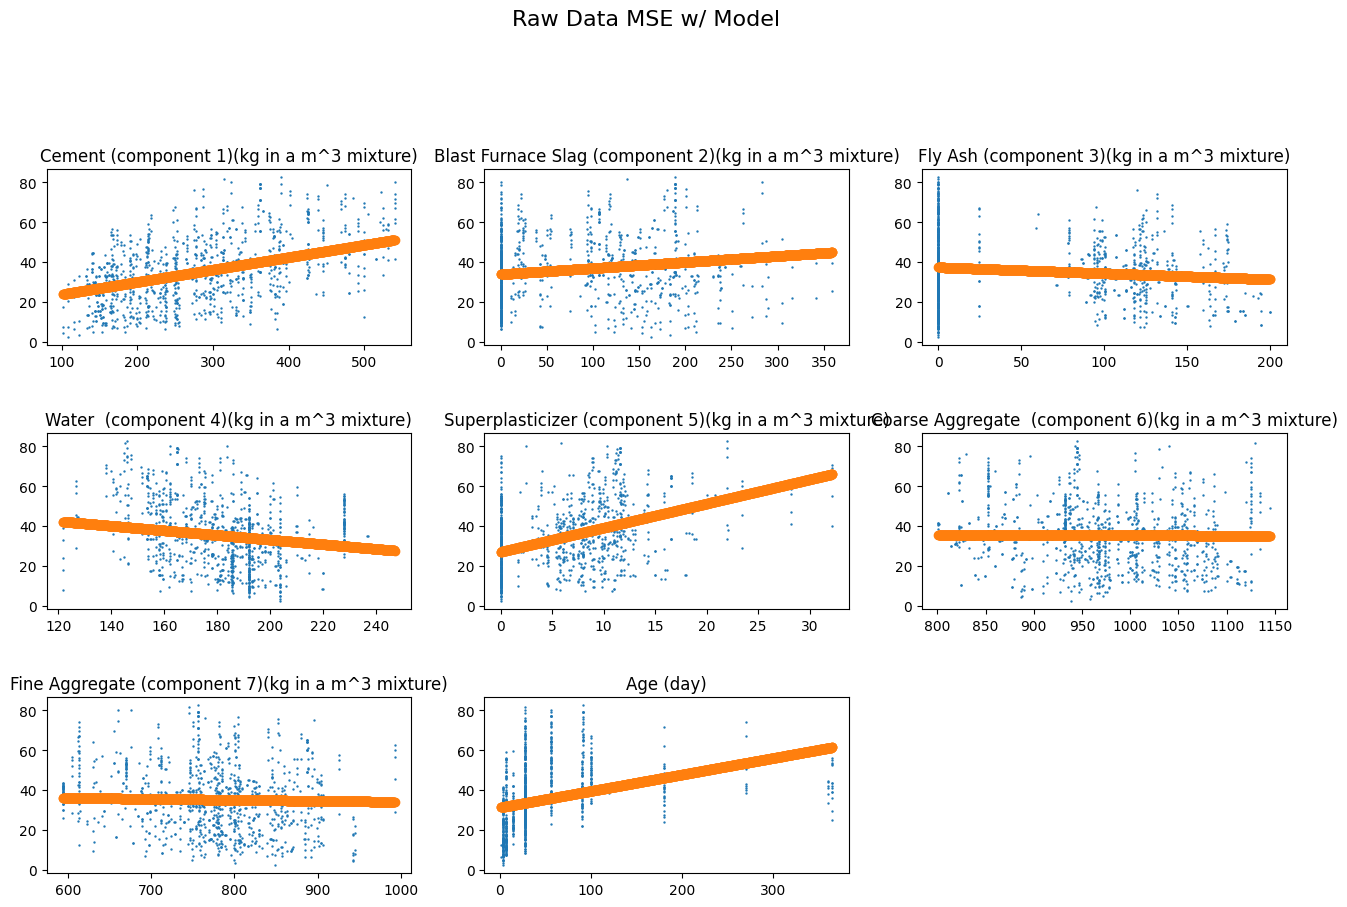

In [54]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('Raw Data MSE w/ Model', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(x_raw[:,index], y_raw, s=0.5)
    x = np.linspace(np.min(x_raw[:,index]), np.max(x_raw[:,index]),1000)
    ax.scatter(x, m_list_Uni_raw[index]*x + b_list_Uni_raw[index])
    ax.set_title(feature_name)
    
plt.show()

## MSE Univariate Data New

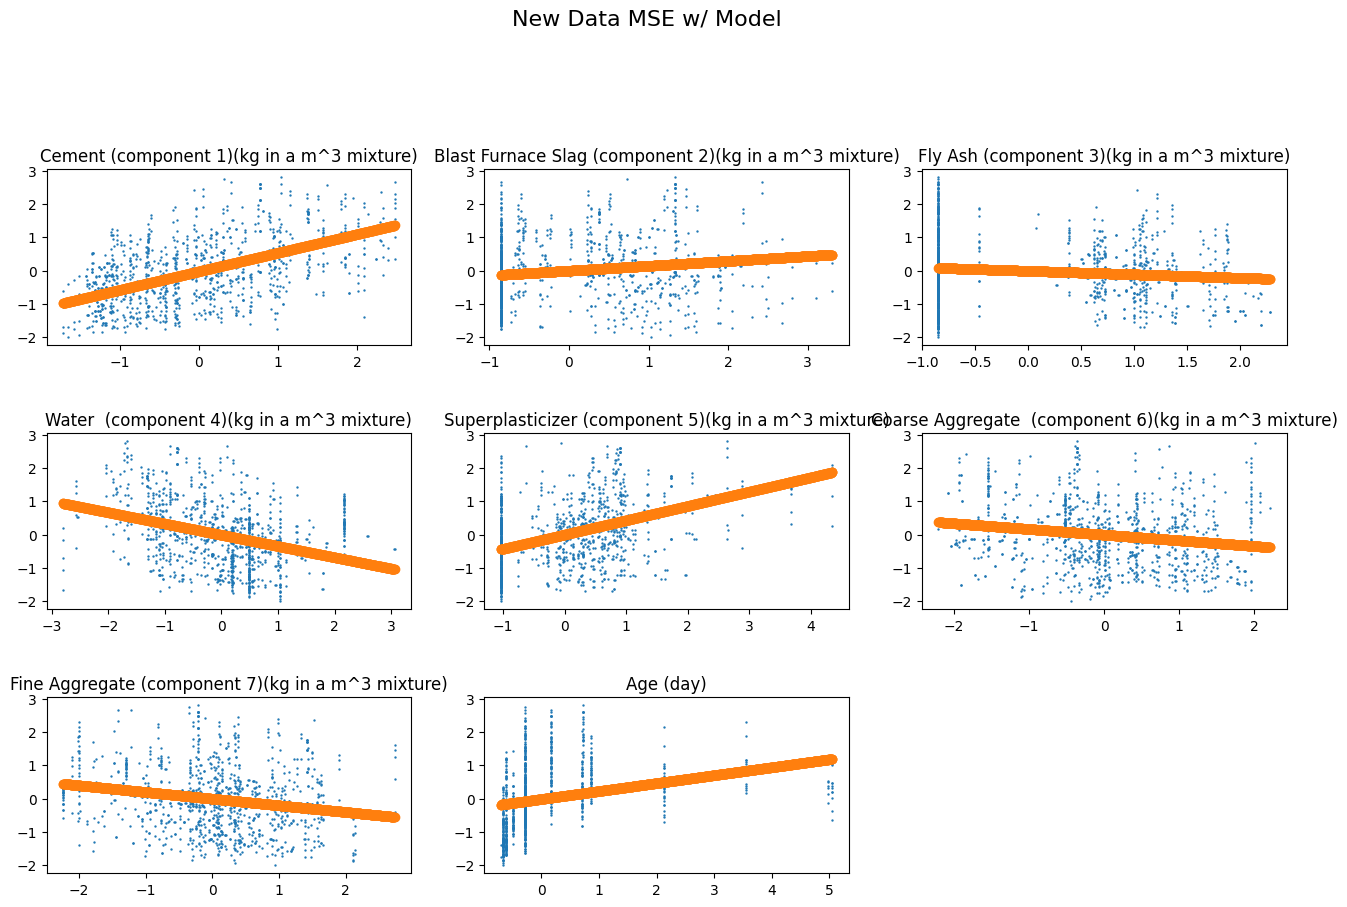

In [55]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('New Data MSE w/ Model', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(x_new[:,index], y_new, s=0.5)
    x = np.linspace(np.min(x_new[:,index]), np.max(x_new[:,index]),1000)
    ax.scatter(x, m_list_Uni_new[index]*x + b_list_Uni_new[index])
    ax.set_title(feature_name)
    
plt.show()

## MAE Univariate Data New

-1.7143864835593436 2.4767146518708167
-0.8564702496505823 3.3090806754772277
-0.8467207089034331 2.280014280272414
-2.8009726473609247 3.0640085824779004
-1.0384398293873227 4.352042301247076
-2.2110630249701337 2.2131570126092885
-2.239824461445038 2.7317736070780514
-0.7070159638428235 5.055221007679098


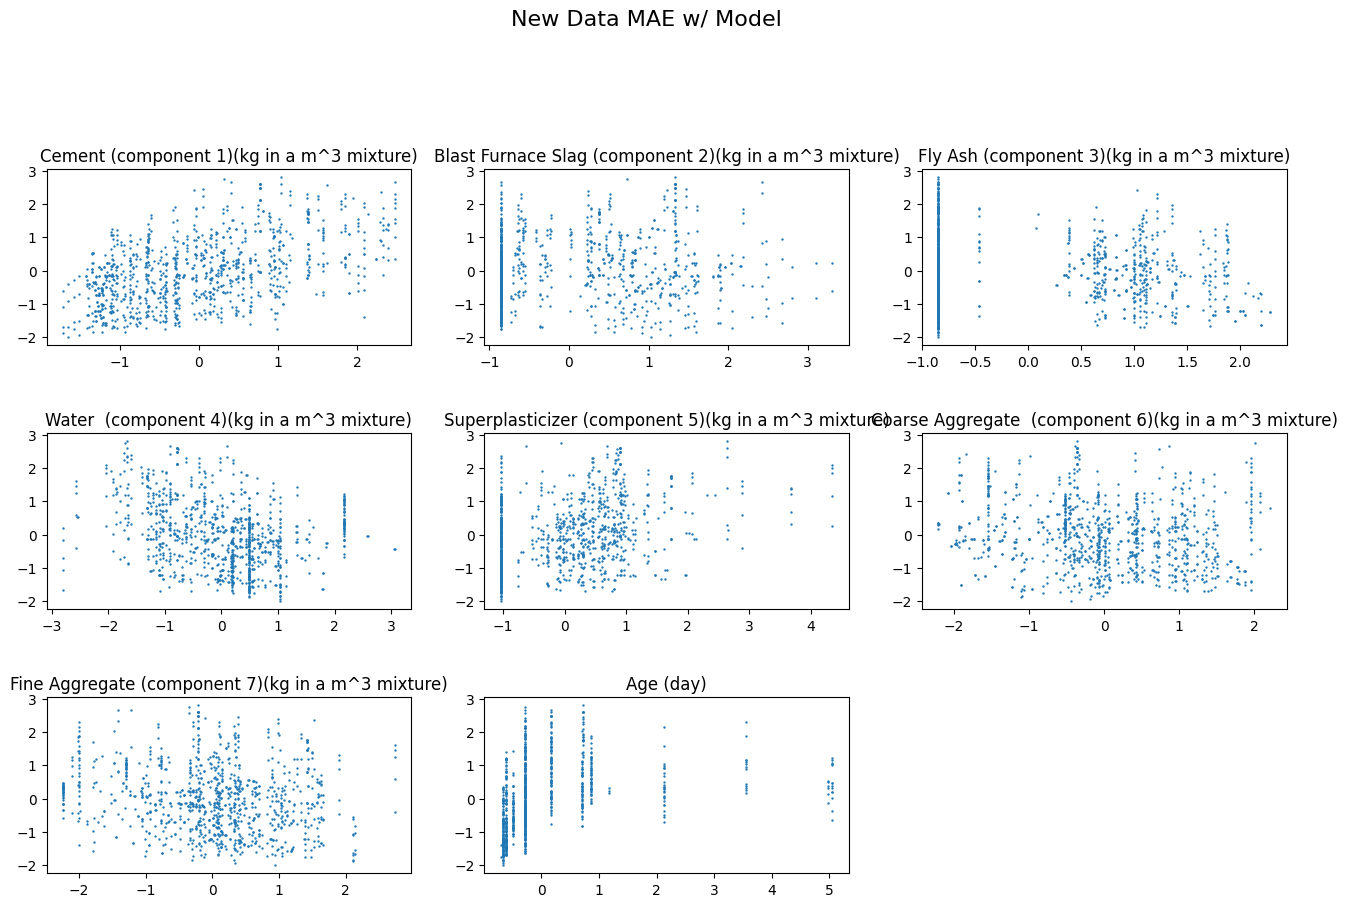

In [62]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('New Data MAE w/ Model', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(x_new[:,index], y_new, s=0.5)
    x = np.linspace(np.min(x_new[:,index]), np.max(x_new[:,index]),1000)
    print(np.min(x_new[:, index]), np.max(x_new[:,index]))
    #ax.scatter(x, m_list_Uni_new_MAE[index]*x + b_list_Uni_new_MAE[index])
    ax.set_title(feature_name)
    
plt.show()